In [2]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation
from utility_classes.historical_data_processor import FTXDataProcessor
# from utility_classes.csv_manager import CSVManager
acc = FTXDataProcessor(api_key=FTX_API_KEY, api_secret=FTX_API_SECRET)
corr = Correlation(spread_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spreads')

plt.rcParams['figure.figsize'] = [35, 35]


## First, cointegration identification


## Pearson's coefficient for spreads
### get the past futures expiration dates

In [2]:
acc.get_expired_futures_dates()


expiration date: 0326 | Date March 2021
expiration date: 1225 | Date December 2020
expiration date: 0925 | Date September 2020
expiration date: 0626 | Date June 2020
expiration date: 20200327 | Date March 2020
expiration date: 20191227 | Date December 2019
expiration date: 20190927 | Date September 2019
expiration date: 20190628 | Date June 2019
expiration date: 20190329 | Date March 2019
BTC-0626 data is missing from FTX end


### draw the daily spread heatmap for futures expiring in 2020/09/25 and 2020/12/25, with minimum value set to 0 


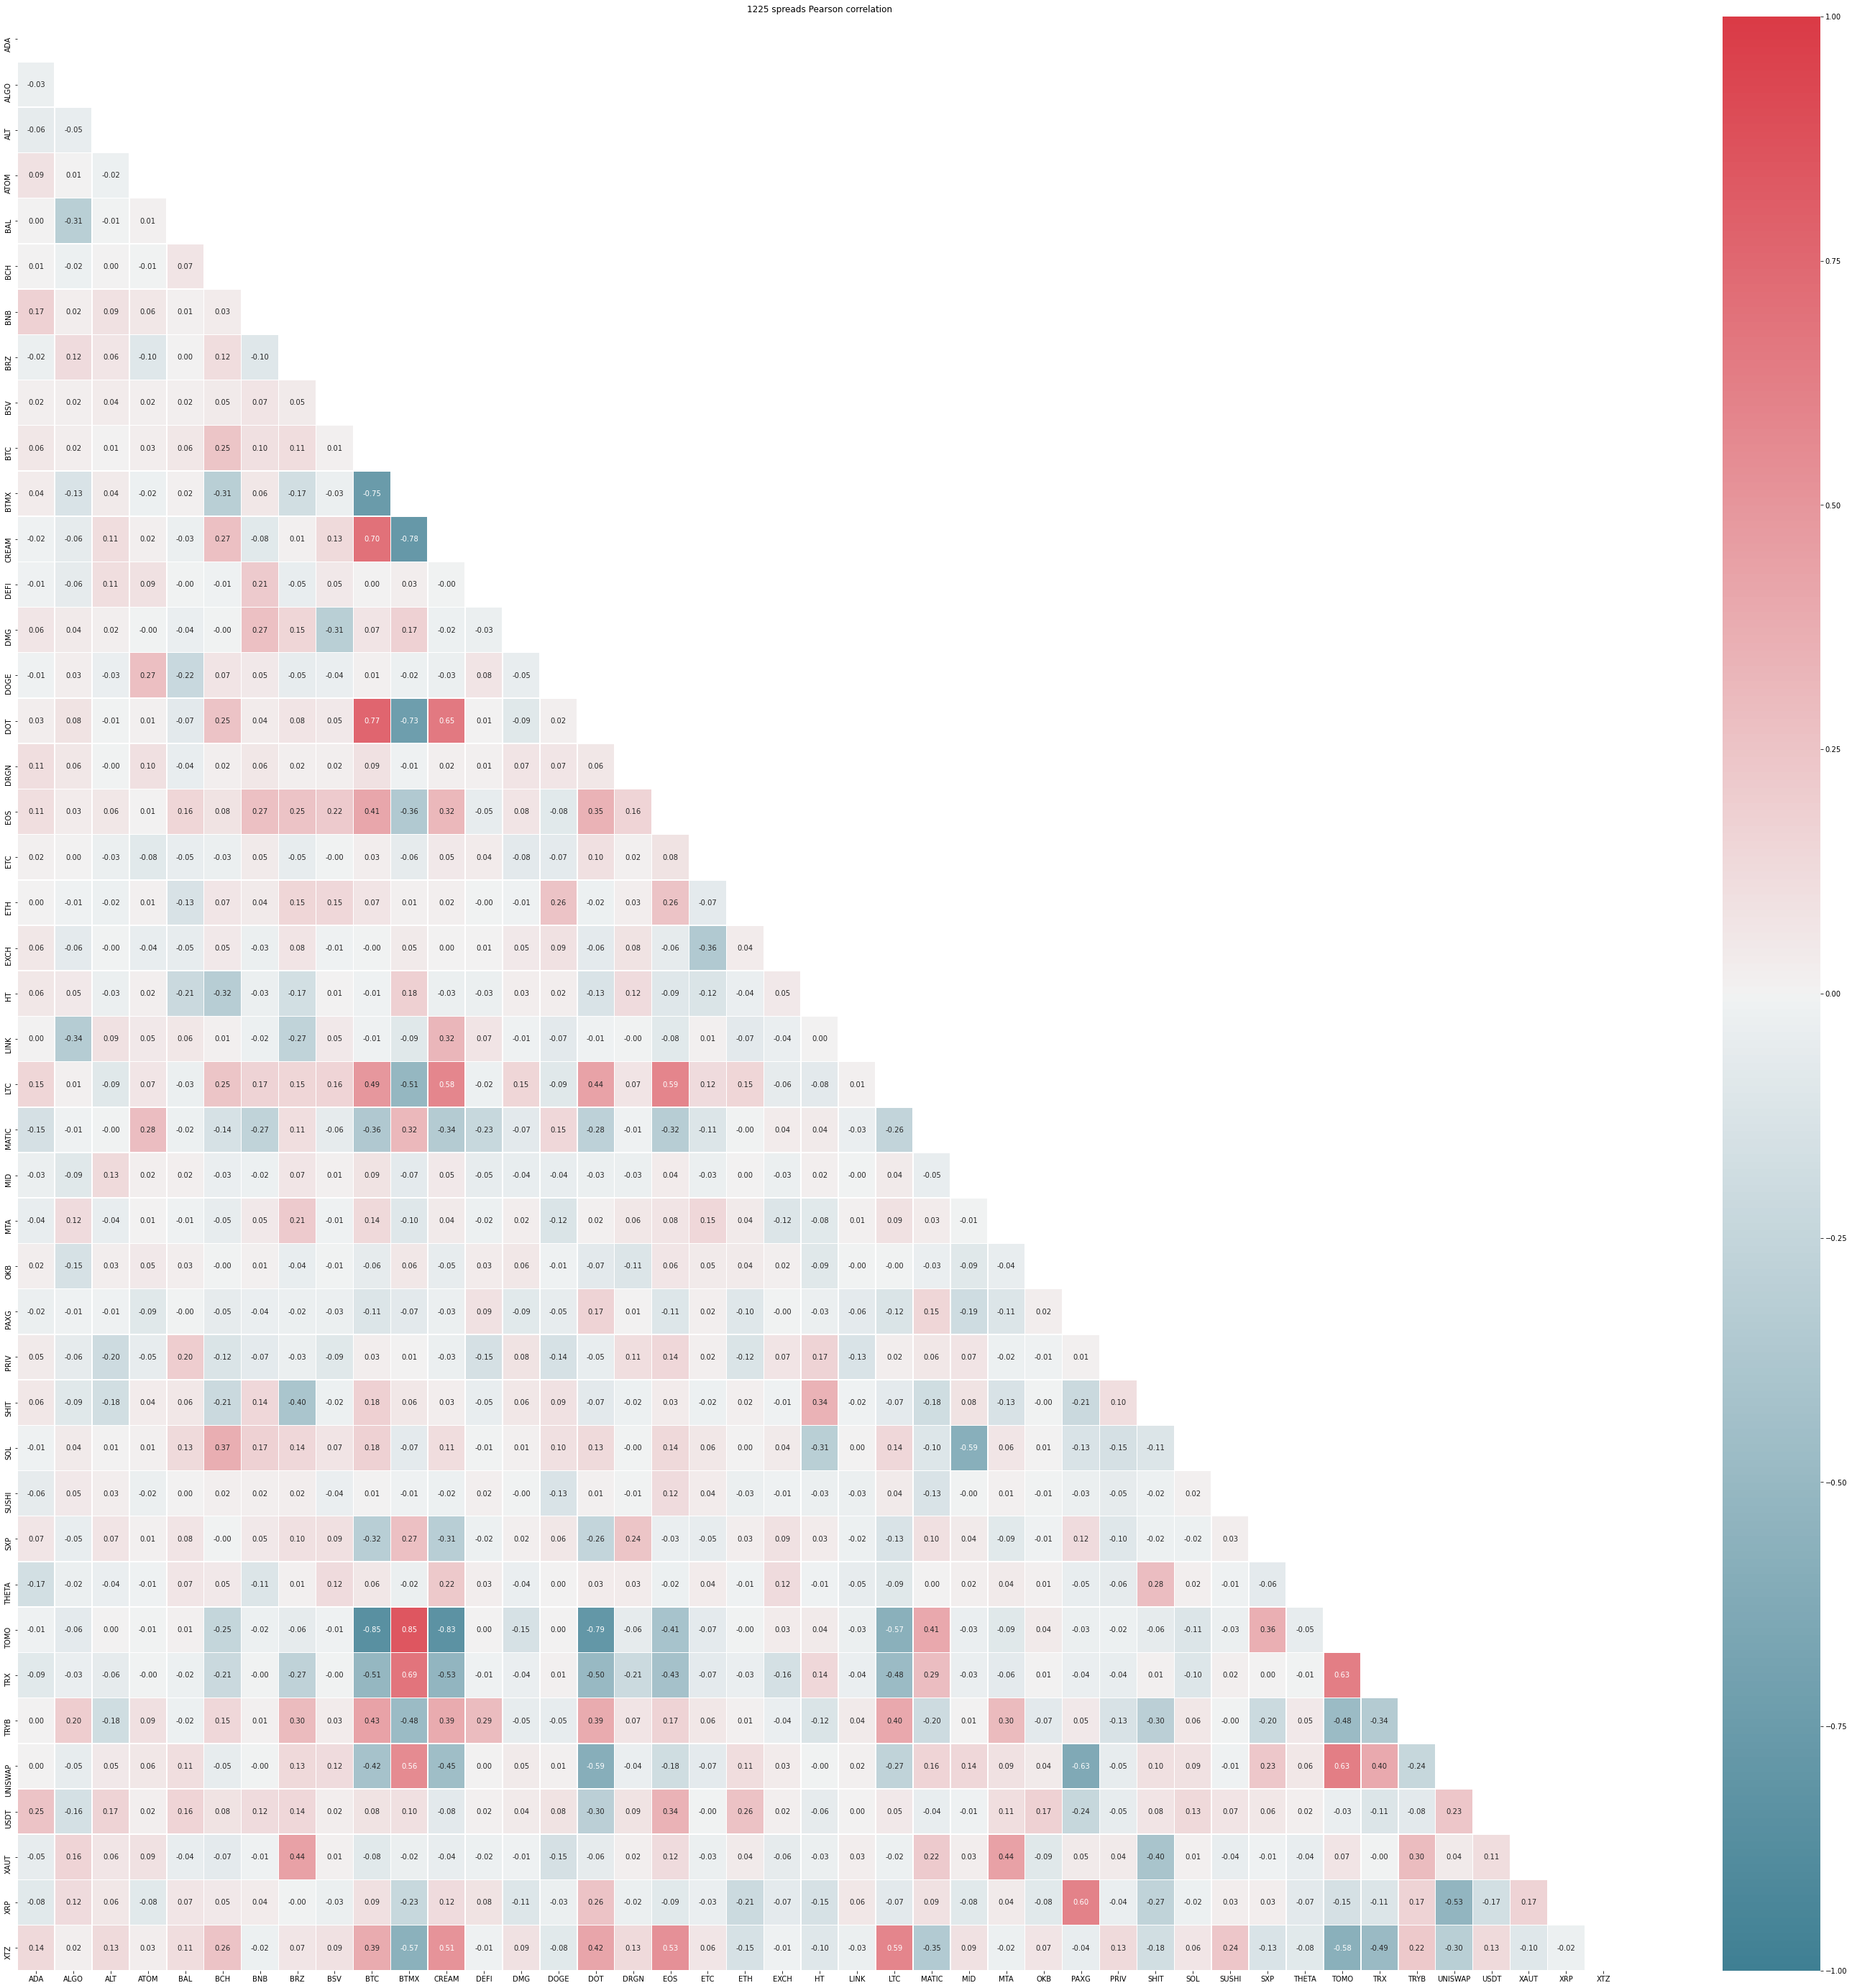

spreads from 2020-09-11T18:40:00+00:00 to 2020-12-25T03:00:00+00:00
['BTC'] have missing values


In [2]:
corr.spreads_correlation_heatmap(futures_date='1225', coint=False, triangular=True, timeframe='24H', annot=True)

Pairs that have p-value larger than 0.5


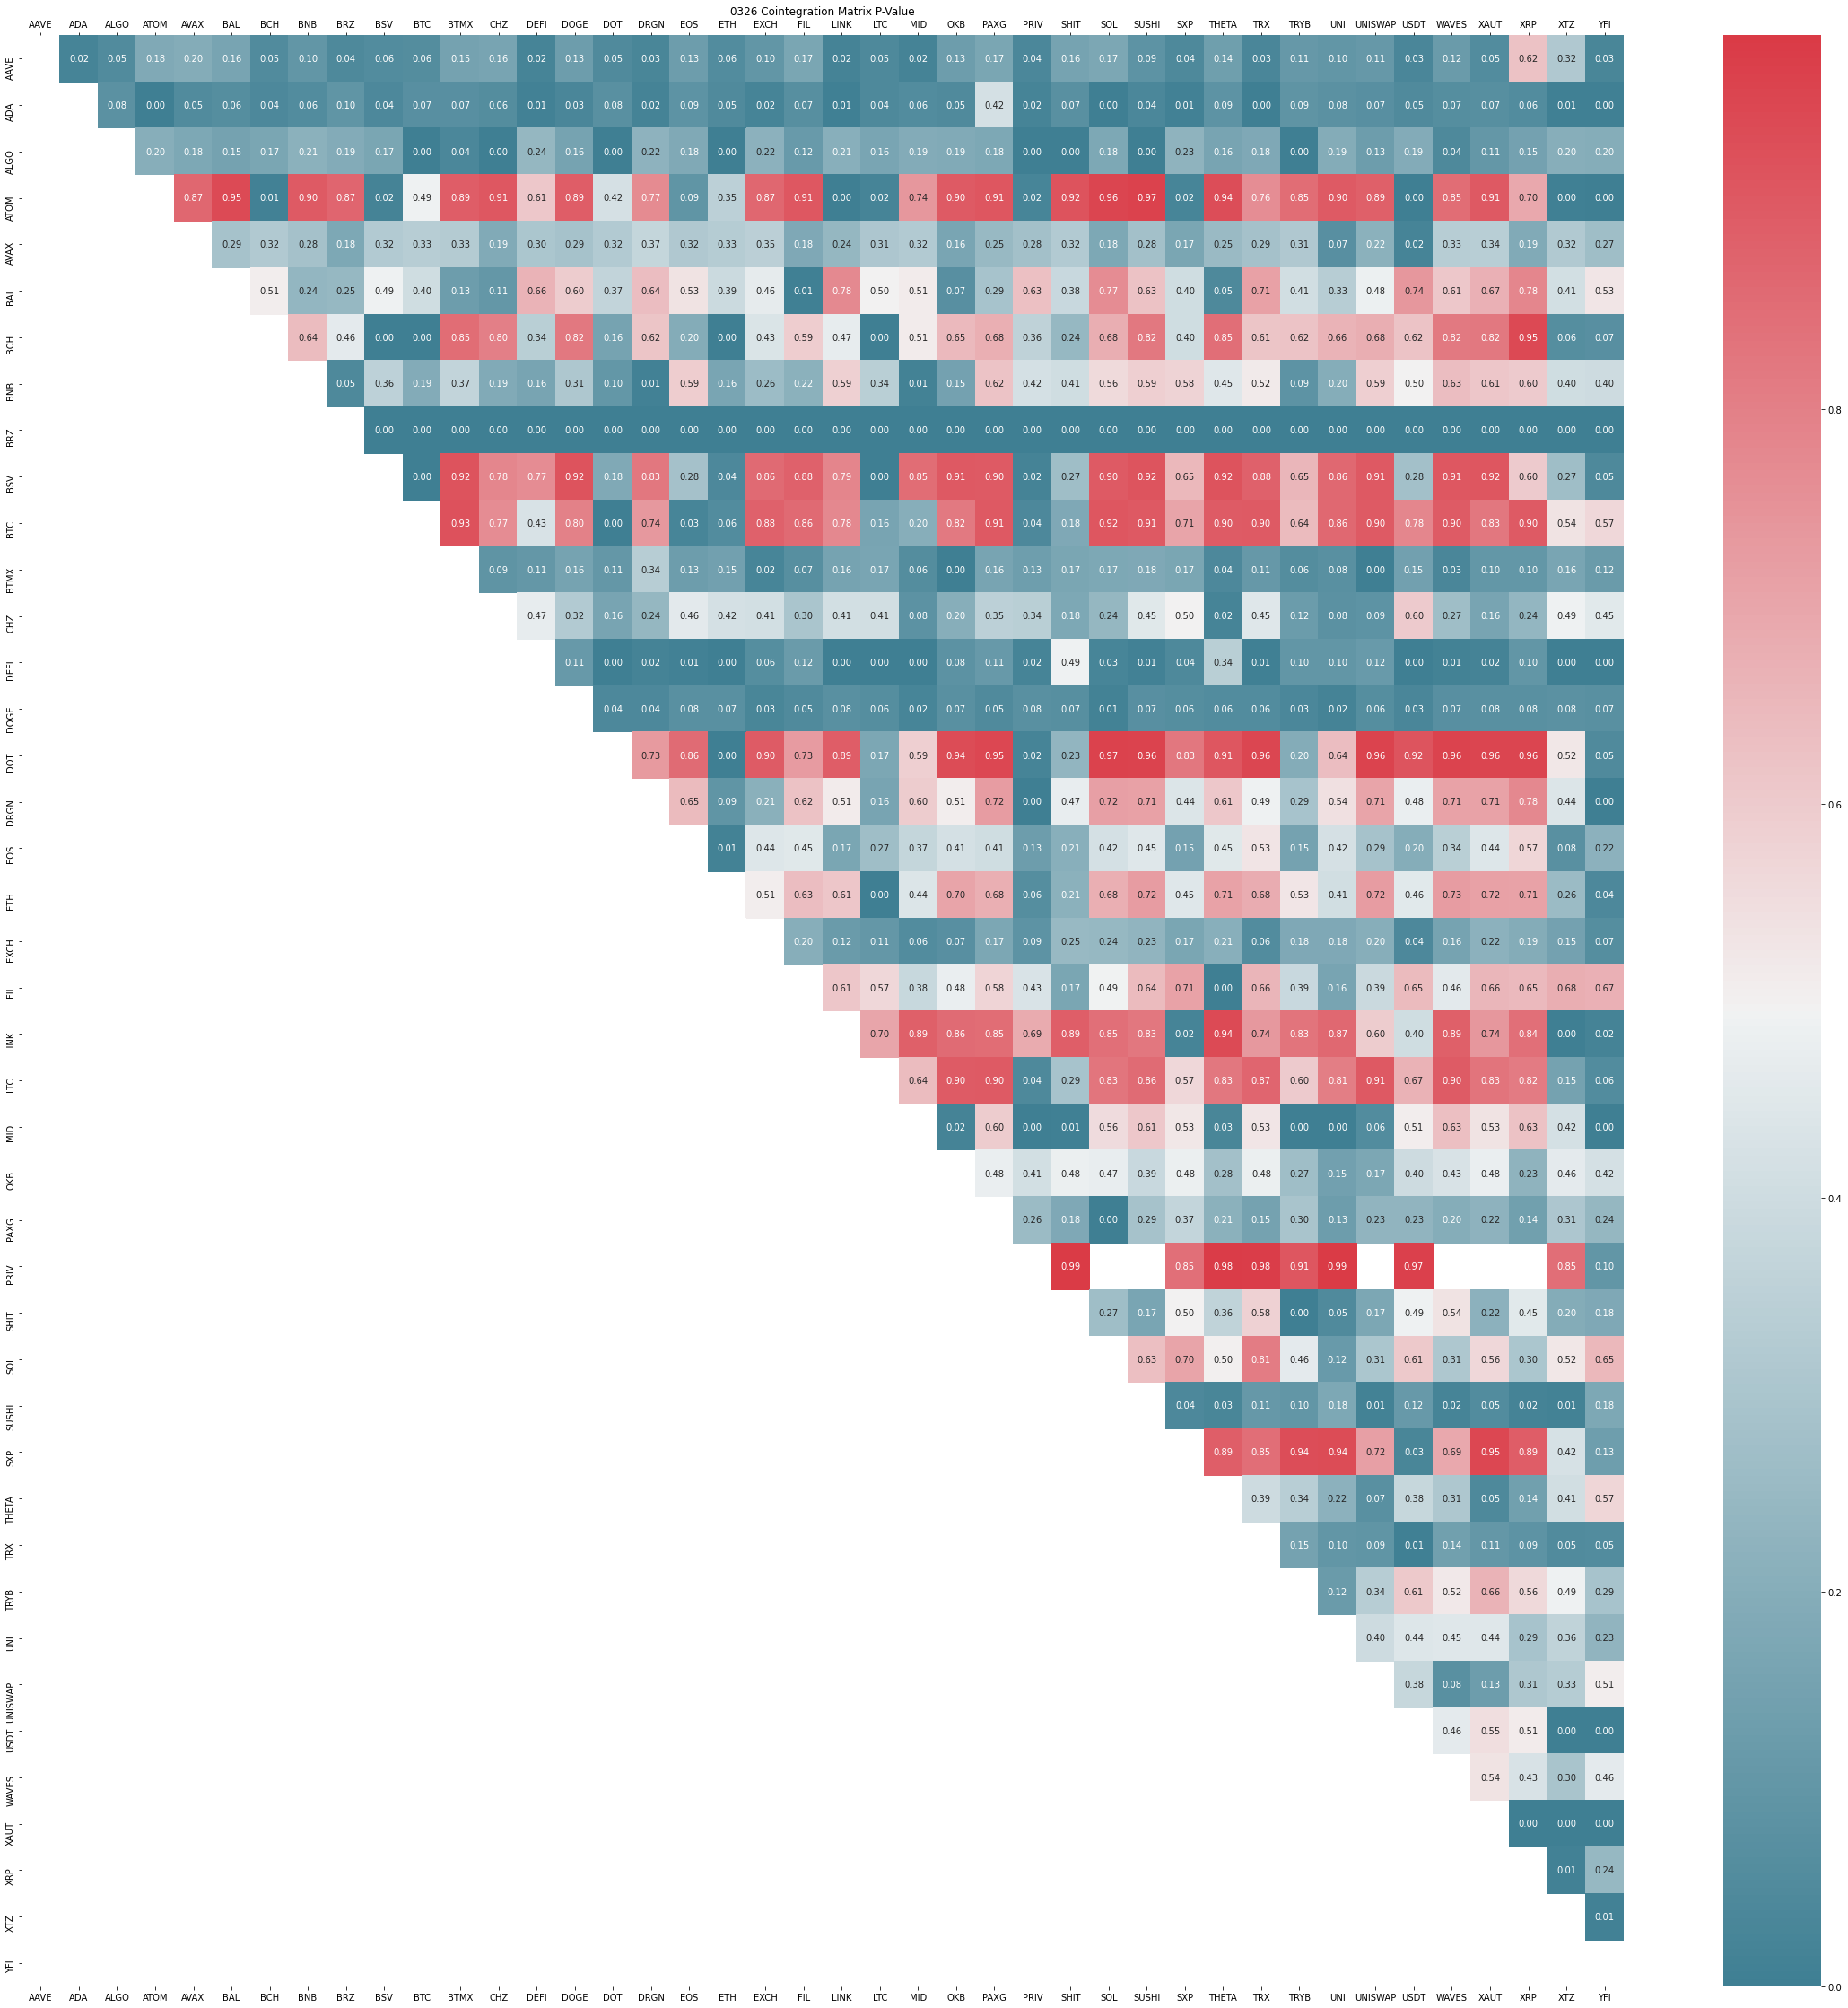

spreads from 2020-12-14T07:27:00+00:00 to 2021-03-26T03:00:00+00:00
['BTC', 'ETH', 'SOL'] have missing values


In [3]:
corr.spreads_correlation_heatmap(futures_date='0326', coint=True, timeframe='H', annot=True)


### selecting cointegrated pairs by using coint function from statsmodels.tsa.stattools 